In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

In [2]:
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [5]:
pd.to_datetime('Jan 1 2010')

Timestamp('2010-01-01 00:00:00')

### Set date time to the index

### Exercise 1

In [6]:
df = df.set_index('date').sort_index()

In [7]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

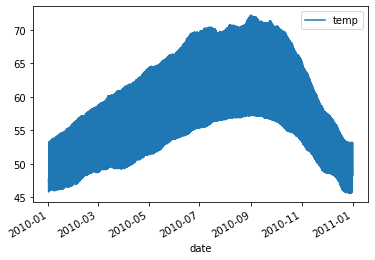

In [8]:
df.plot()

<AxesSubplot:xlabel='date'>

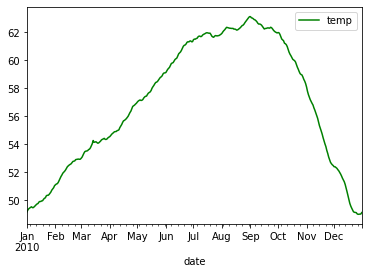

In [9]:
df.resample('D').mean().plot(color = 'green')

# Exercise 2

<AxesSubplot:xlabel='date'>

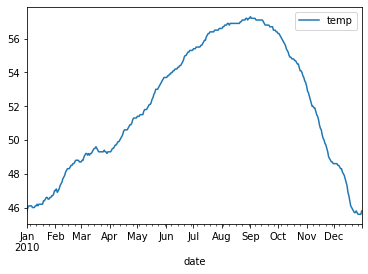

In [10]:
df.resample('D').min().plot()

## Exercise 3

<AxesSubplot:xlabel='date'>

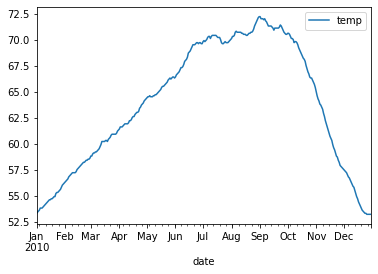

In [11]:
df.resample('D').max().plot()

In [13]:
# which month is the coldest on average?
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [19]:
# 6 Resample by the day and calculate the min/max temp for the day

daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [21]:
# which month has the highest average temperature?
daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


<AxesSubplot:xlabel='date'>

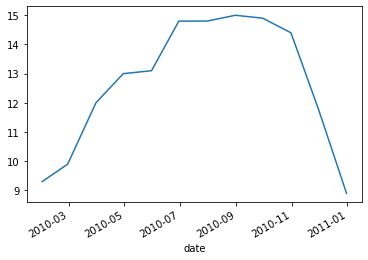

In [23]:
daily.resample('M').max().temp_diff.sort_values().plot()

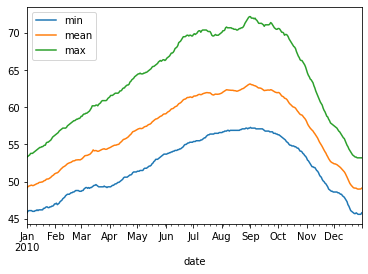

In [25]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()
None

In [30]:
from vega_datasets import data
sw = data.seattle_weather()

In [33]:
sw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [34]:
sw.date.head()

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: date, dtype: datetime64[ns]

In [35]:
sw = sw.set_index('date').sort_index()

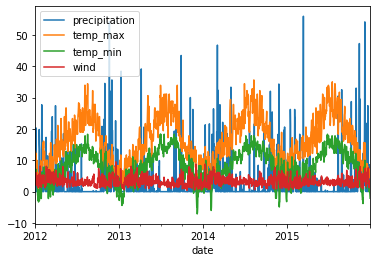

In [39]:
sw.plot()
None

<AxesSubplot:xlabel='date'>

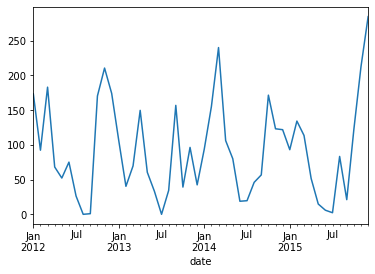

In [40]:
# Visualize the amount of monthly precipitation over time

sw.precipitation.resample('M').sum().plot()

<AxesSubplot:xlabel='date'>

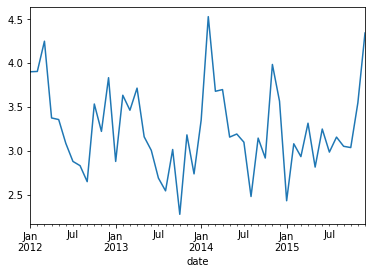

In [42]:
# Visualize the amount of wind over time. 
# Choose a time interval you think is appropriate.

sw.wind.resample('M').mean().plot()

In [44]:
# Whcih year-month combination is the windiest?

sw.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

In [45]:
sw.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [50]:
sw['is_sunny'] = sw.weather == 'sun'

In [51]:
sw.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [53]:
# what's the sunniest year?

sw.resample('Y').is_sunny.mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: is_sunny, dtype: float64

In [58]:
sw['month'] = sw.index.month

In [59]:
sw.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [60]:
# total rainfall by month

sw.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

In [61]:
# Which month has the most number of days with a non-zero amount of precipitation?

# we need to find whether or not it rained each day (non-zero precipitation)
# aggregate this by month

In [63]:
sw['did_rain'] = sw.precipitation > 0

In [64]:
sw.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,did_rain
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1,True


In [66]:
# Which month has the most number of days with a non-zero amount of precipitation?

sw.groupby('month').did_rain.mean().sort_values().tail(5)

month
1     0.532258
3     0.588710
11    0.591667
2     0.646018
12    0.653226
Name: did_rain, dtype: float64

### Flight Dataset

In [67]:
# Flight dataset

df = data.flights_20k().set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [68]:
# how many observations?

df.shape

(20000, 4)

In [69]:
# what time period the data span:

df.index.min(), df.index.max()

(Timestamp('2001-01-01 00:01:00'), Timestamp('2001-03-31 21:30:00'))

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [70]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x    

In [71]:
# use the function (.apply)

%timeit df.delay = df.delay.apply(delay_to_zero)

5.49 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
# another method (np.where). Much faster if you have large dataset

%timeit df.delay = np.where(df.delay < 0, 0, df.delay)

276 µs ± 5.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
df.head()


,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [74]:
# Which hour of the day has the highest average delay?

df['hour'] = df.index.hour

df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [75]:
# groupby by 'hour' and look at mean delay:

df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [76]:
# Does the day of the week make a difference in the delay amount?
# make a new column 'week_day'

df['week_day'] = df.index.day_name()

In [77]:
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [78]:
# groupby the weekday and find mean delay:

df.groupby('week_day').delay.mean()

week_day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [79]:
# Does the month make a difference in the delay amount?  
# groupby the month and find mean delay:

df['month'] = df.index.month
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

## Bonus

In [80]:
df = data.iowa_electricity().set_index('year').sort_index()

In [81]:
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [82]:
df.shape

(51, 2)

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows 
    - (Hint:df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. 
    - Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

In [83]:
# what is total generation by year?
df.net_generation.resample('YS').sum()

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [84]:
# map the resampled data above (total by year) to the original df

df['year_total'] = df.index.map(df.net_generation.resample('YS').sum())

In [85]:
# For each row, calculate the percentage of the year's total that energy source provided.

df['percentage'] = df.net_generation/df.year_total

In [86]:
df.head()

,source,net_generation,year_total,percentage
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2001-01-01,Nuclear Energy,3853,40651,0.094782
2001-01-01,Renewables,1437,40651,0.035350
2002-01-01,Fossil Fuels,35991,42528,0.846290
2002-01-01,Nuclear Energy,4574,42528,0.107553


In [87]:
df1 = df.reset_index()

<AxesSubplot:xlabel='year', ylabel='net_generation'>

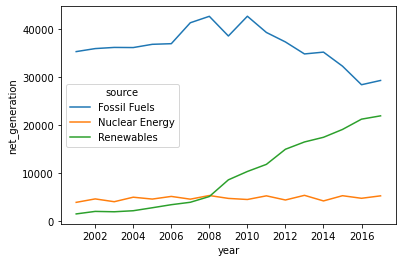

In [88]:
# Lineplot of generation over time, color by source:

sns.lineplot(data = df1, x = 'year', y = 'net_generation', hue = 'source')

In [89]:
# Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

# lets make a new column called 'c_year' which is just the year

df['c_year'] = df.index.year

In [90]:
df.head()

,source,net_generation,year_total,percentage,c_year
year,,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868,2001
2001-01-01,Nuclear Energy,3853,40651,0.094782,2001
2001-01-01,Renewables,1437,40651,0.035350,2001
2002-01-01,Fossil Fuels,35991,42528,0.846290,2002
2002-01-01,Nuclear Energy,4574,42528,0.107553,2002


In [91]:
# use pivot_table to have years as columns:

df_pivot = df.pivot_table(index = ['source'], columns= 'c_year', values = 'net_generation' )

In [92]:
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


<AxesSubplot:xlabel='year'>

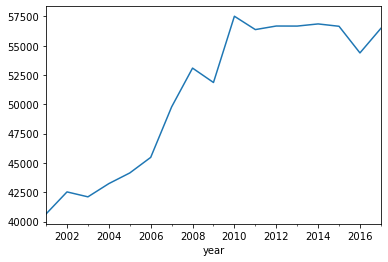

In [93]:
# Is the total generation increasing over time?

df.net_generation.resample('YS').sum().plot()

In [94]:
# How would you control for increasing consumption over time when considering how much energy is coming from each source?
# express each number as a % of the year's total

# lets normalize the dataframe (columnwise):

cols = list(df_pivot.columns)
df_pivot[cols] = df_pivot[cols] / df_pivot[cols].sum()

In [95]:
# normalized dataframe
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,0.869868,0.846290,0.860522,0.837381,0.835497,0.813978,0.831472,0.804996,0.744712,0.743362,0.698249,0.659532,0.615370,0.620009,0.570473,0.522922,0.519318
Nuclear Energy,0.094782,0.107553,0.094711,0.114002,0.102798,0.112045,0.090783,0.099499,0.090225,0.077397,0.092512,0.076700,0.093894,0.073029,0.092546,0.086482,0.092322
Renewables,0.035350,0.046158,0.044767,0.048617,0.061706,0.073978,0.077745,0.095505,0.165063,0.179242,0.209239,0.263767,0.290736,0.306962,0.336981,0.390596,0.388360


<AxesSubplot:xlabel='c_year'>

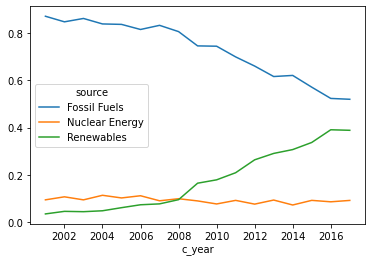

In [96]:
# transpose the dataframe above and plot the data for three sources
df_pivot.T.plot()

## Takeaways:

- Fossil fuel use (as % of total) is decreasing.
- Nuclear energy is flat
- Renewables use is increasing